# DA5401 DATA ANALYTICS LABORATORY Assignment 3 

### Utkarsh Pathak DA24S011

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import math

#comment below if not using ipython notebook
%matplotlib inline

### load the CSV file into a dataframe

In [2]:
df = pd.read_csv('Assignment3.csv')
for col in df.columns:
    df[col] = df[col].astype(float)
    
df.head()

x1      x2      x3     x4      x5        y
0  7.11 -447.71  135.66  92.41   96.04  9131.40
1  7.06 -455.33   94.49  91.76   92.16  9001.86
2  6.89 -466.86  186.25  89.54  100.00  8595.85
3  7.25 -440.53  176.83  94.24   84.64  9469.94
4  7.24 -445.92  185.90  94.11   88.36  9448.98

There are 5 predictor variables and one output variable. Let's blinded fit an OLS model to find if we can get a solution!

### prepare the dataset for regression

In [3]:
xx = np.array(df[['x1','x2','x3','x4','x5']])
yy = np.expand_dims(df['y'], 1)

### helper methods

In [4]:
def SSE(y, yhat):
    return np.sum((y-yhat)**2)


### fit the OLS model and check the loss.

**Ordinary Least Squares (OLS) minimizes:**

$$
\sum_{i=1}^{n} \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_{i1} - \dots - \hat{\beta}_p x_{ip} \right)^2
$$


In [5]:
from sklearn import linear_model
model1 = linear_model.LinearRegression()
model1.fit(xx, yy)
yhat = model1.predict(xx)
loss = SSE(yy, yhat)
print("Beta :", model1.coef_, " Bias :", model1.intercept_)
print("Loss :",loss)

Beta : [[-1.06736899e+03  1.00659916e-01 -5.71765977e-02  2.84363302e+02
   1.62848730e+00]]  Bias : [-9655.31030896]
Loss : 71877.84134016866


The loss is observed to very high!  Something's fishy.  Ain't it!?

### let's check the statistics of the features and outputs.

In [6]:
df.describe()

x1          x2          x3          x4          x5  \
count  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     7.548713   23.755050  111.371386   98.133762   34.000000   
std      0.380115  292.850177   55.812213    4.942089   30.557704   
min      6.680000 -466.860000    9.800000   86.830000    0.000000   
25%      7.250000 -208.890000   66.380000   94.240000    6.760000   
50%      7.530000   38.950000  104.180000   97.900000   25.000000   
75%      7.800000  262.920000  168.160000  101.420000   57.760000   
max      8.370000  546.880000  195.810000  108.850000  100.000000   

                  y  
count    101.000000  
mean   10244.460297  
std     1022.766123  
min     8062.540000  
25%     9469.940000  
50%    10187.660000  
75%    10866.630000  
max    12631.050000

### let's check the correlation amongst the predictor variables.

In [7]:
corr = np.corrcoef(xx.T)
print(corr)

[[ 1.          0.70227559 -0.22369731  0.99997833 -0.00144945]
 [ 0.70227559  1.         -0.03260292  0.70319638  0.00261306]
 [-0.22369731 -0.03260292  1.         -0.22480781  0.08132155]
 [ 0.99997833  0.70319638 -0.22480781  1.         -0.00177718]
 [-0.00144945  0.00261306  0.08132155 -0.00177718  1.        ]]


### let's check the features are correlating heavily.

In [8]:
print(corr > 0.9)

[[ True False False  True False]
 [False  True False False False]
 [False False  True False False]
 [ True False False  True False]
 [False False False False  True]]


Looks like feature 1 and feature 4 are heavily correlating.  It may be worth removing one of those features from our system.

### let's add the output column to the mix and re-evaluate the correlation coefficient.

In [9]:
all_data = np.concatenate((xx, yy), axis=1)
corr_all = np.corrcoef(all_data.T)
print(corr_all)

[[ 1.          0.70227559 -0.22369731  0.99997833 -0.00144945  0.9982136 ]
 [ 0.70227559  1.         -0.03260292  0.70319638  0.00261306  0.71670271]
 [-0.22369731 -0.03260292  1.         -0.22480781  0.08132155 -0.22026513]
 [ 0.99997833  0.70319638 -0.22480781  1.         -0.00177718  0.99826603]
 [-0.00144945  0.00261306  0.08132155 -0.00177718  1.          0.04660974]
 [ 0.9982136   0.71670271 -0.22026513  0.99826603  0.04660974  1.        ]]


In [10]:
print(corr_all > 0.7)

[[ True  True False  True False  True]
 [ True  True False  True False  True]
 [False False  True False False False]
 [ True  True False  True False  True]
 [False False False False  True False]
 [ True  True False  True False  True]]


### Let us visualise it first to get underlying relation

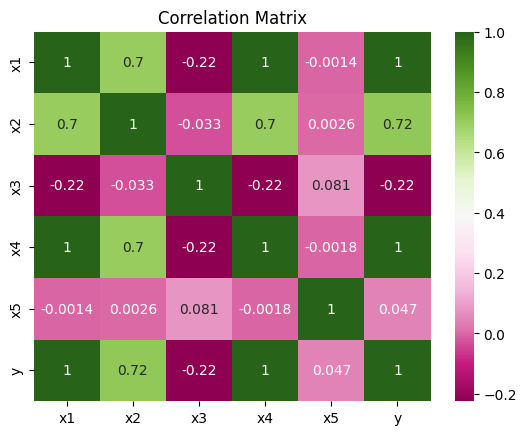

In [66]:
import seaborn as sns

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='PiYG')
plt.title('Correlation Matrix')
plt.show()


Looks like features 1, 2 and 4 are strongly correlating with the output individually.  We see that the features 3 and 5 are not correlating well.  But, that doesn't mean that they are useless.  Remember, correlation is a linear relationship estimation method.  When the relationship is not-linear, correlation coefficient will not be conclusive.  So, our resolve here is; either the features are not relevant or there is a non-linear relationship amongst the features and the output.

### let's try to visualize the relationships through a pair-plot.

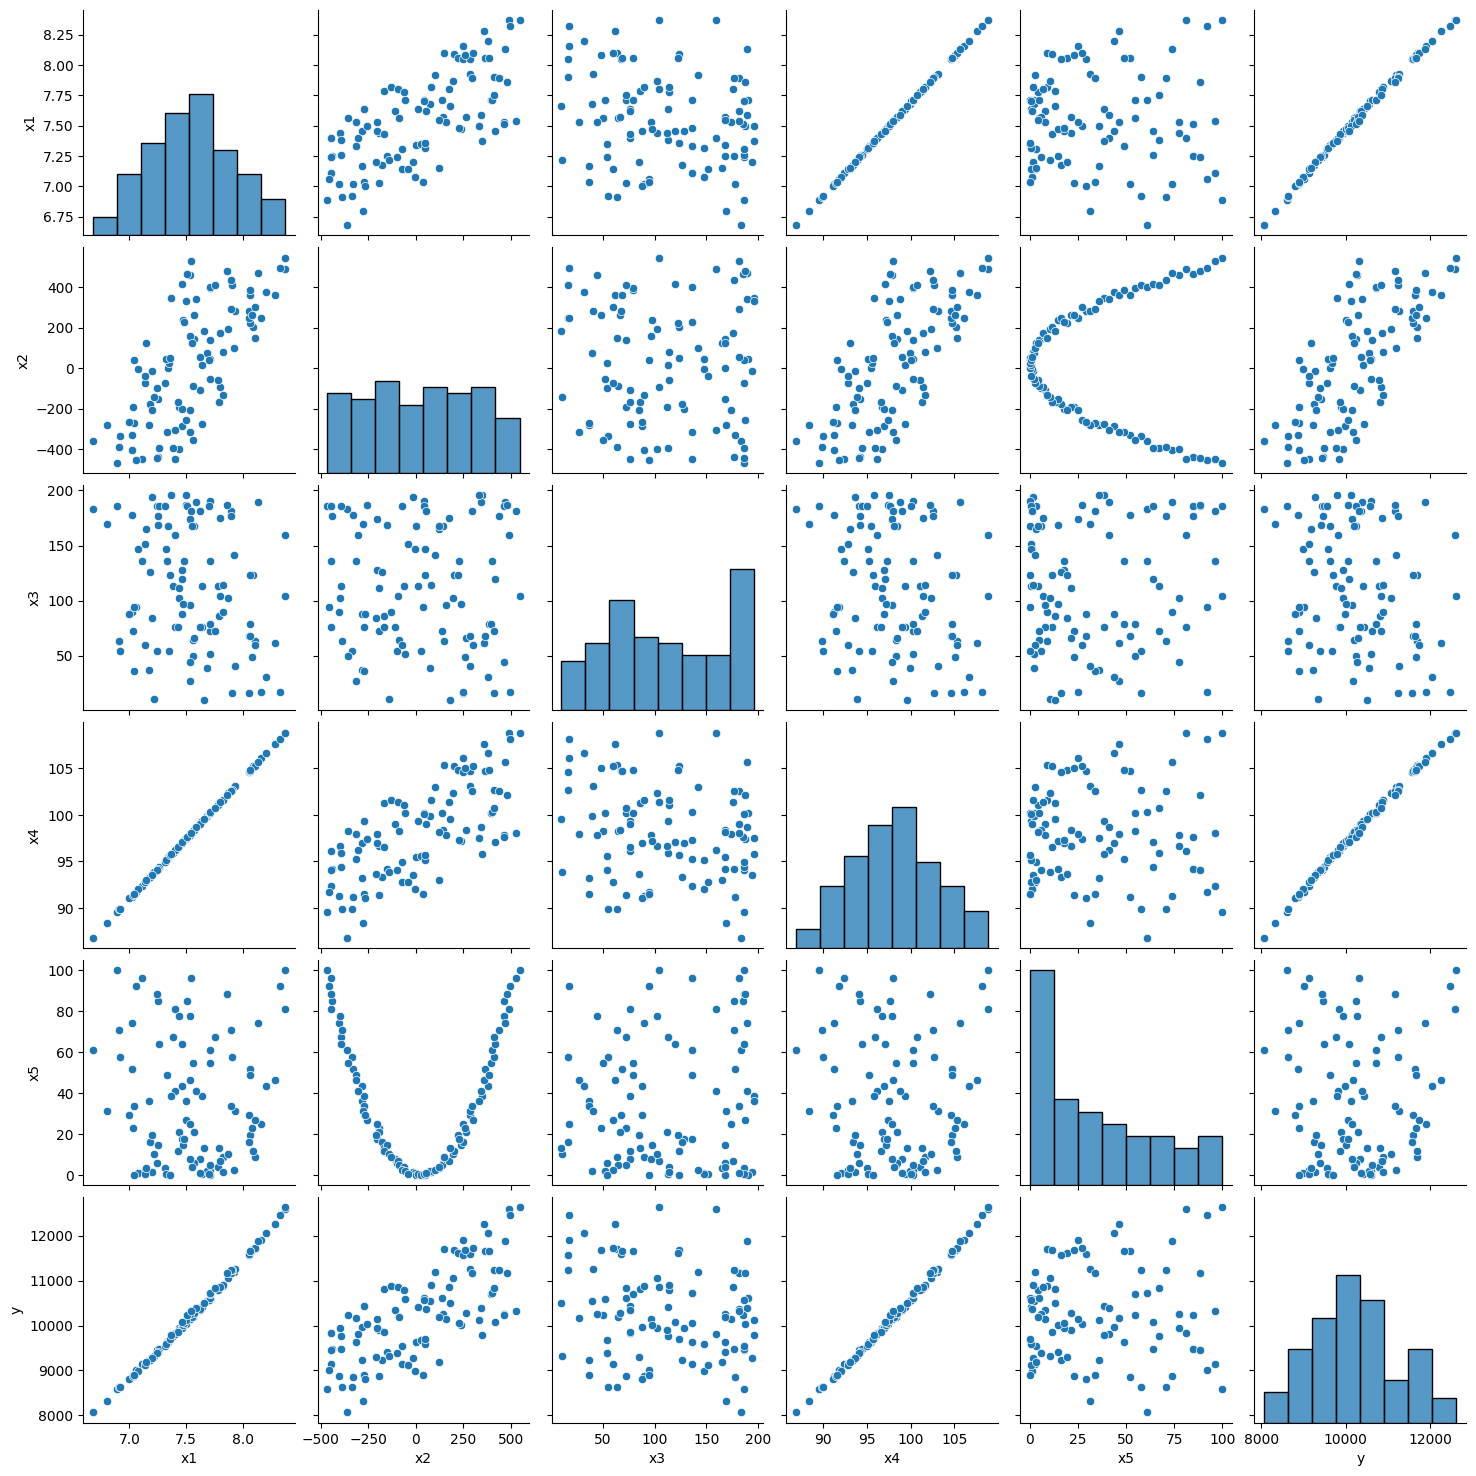

In [67]:

sns.pairplot(df)

The heatmap and the parplot above shows the correlation matrix of the variables:

- **x1** has a strong positive correlation with **y**.
- **x2** has a moderate positive correlation with **y**.
- **x3** has a weak negative correlation with **y**.
- **x4** has a positive correlation with **y**.
- **x5** has a weak positive correlation with **y**.


**Multicollinearity**: There are significant correlations among some predictors:

- **x1** and **x5** have a strong negative correlation .
- **x2** and **x4** have a strong positive correlation.

This multicollinearity might be causing instability in the regression coefficients, as indicated by the high condition number.


**Influence on y**:

- **x1** and **x5** are highly correlated with **y** in opposite directions, suggesting they might be capturing similar information but inversely.
- **x2** and **x4** also show moderate correlations with **y**, but they might be redundant given their mutual correlation.


### Brilliant, more patterns have evolved.  And in fact, the mathematical model is almost visible from the plot!

In [18]:
%pip install statsmodels

  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/34/1f/ab80ddc1ebebe9f7bb18da1cc7ceb96f789809a3381565092c358ff71a72/statsmodels-0.14.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for patsy>=0.5.4 from https://files.pythonhosted.org/packages/43/f3/1d311a09c34f14f5973bb0bb0dc3a6e007e1eda90b5492d082689936ca51/patsy-0.5.6-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 29.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 5.4 MB/s eta 0:00:00ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


# LEt us try Ridge and Lasso as the regression
- **Ridge**: Retains all features but controls their influence, which is useful when we believe that all features contribute to the model, but some may need to be constrained.


**Ridge Regression minimizes:**

$$
\sum_{i=1}^{n} \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_{i1} - \dots - \hat{\beta}_p x_{ip} \right)^2 \quad \text{with the constraint} \quad \sum_{j=1}^{p} \hat{\beta}_j^2 \leq t
$$
- **Lasso**: Tends to produce a simpler model by eliminating some features, which can be beneficial when we believe that not all features are important.

**Lasso minimizes:**

$$
\sum_{i=1}^{n} \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_{i1} - \dots - \hat{\beta}_p x_{ip} \right)^2 \quad \text{with the constraint} \quad \sum_{j=1}^{p} \left|\hat{\beta}_j\right| \leq t
$$

### But First Let's see if removing and transforming correlated features can help in improving the Loss:

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

df = pd.read_csv('Assignment3.csv')

X = df[['x1', 'x2', 'x3', 'x4', 'x5']]
y = df['y']

#fit OLS model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

baseline_sse = model.ssr
print(f'Baseline SSE Loss: {baseline_sse:.2f}')


# Selecting the relevant features and apply transformations 

X_selected = df[['x4', 'x2', 'x3', 'x5']]  #Remmved x1 as one of the dependent feature
X_selected['x3'] = np.log(X_selected['x3']) 
# X_selected['x5'] = np.log(X_selected['x5'])

# Try OLS model on selected and transformed features
X_selected = sm.add_constant(X_selected)
model_selected = sm.OLS(y, X_selected).fit()
new_sse = model_selected.ssr
print(f'New SSE Loss: {new_sse:.2f}')

print(model_selected.summary())


Baseline SSE Loss: 71877.84
New SSE Loss: 72382.59
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.466e+04
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          1.03e-150
Time:                        22:06:30   Log-Likelihood:                -475.33
No. Observations:                 101   AIC:                             960.7
Df Residuals:                      96   BIC:                             973.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

# Let us now try Ridge and Lasso to see if error decreases furthr: 

Ridge SSE LOSS: =  79726.44170560515  VS Lasso SSE LOSS: ==  79698.814180599
Lasso Coefficients== [ 9.91948507e+02  3.23302028e+01 -5.09308113e+00  1.06485061e-01
  4.91019515e+01]
Features removed by Lasso: ['x4']
Ridge Coefficients== [490.18357141  37.78101913  -6.3743052  492.95848717  48.95579266]


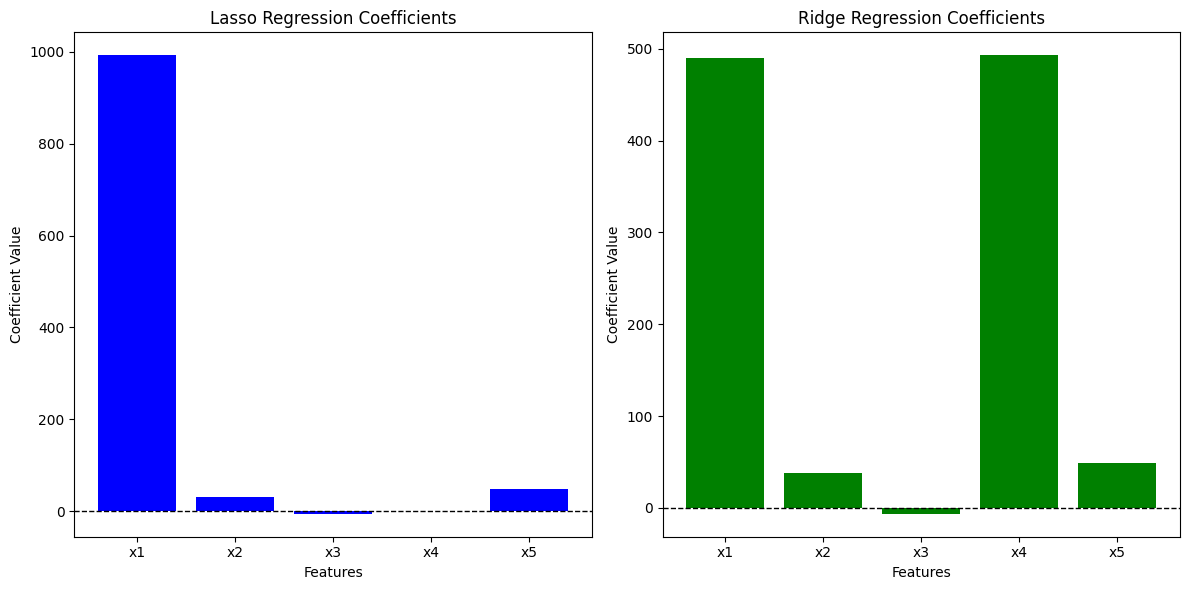

The loss is high still


In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
#========================================================================================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['x1', 'x2', 'x3', 'x4', 'x5']])

# Fit Lasso regression model
lasso = Lasso(alpha=0.1)  # Taking alpha as 0.1
lasso.fit(X_scaled, df['y'])
lasso_coefficients = lasso.coef_
y_pred_lasso = lasso.predict(X_scaled)
# Calculate SSE for Lasso
sse_lasso = np.sum((df['y'] - y_pred_lasso) ** 2)


# Fit Ridge regression model
ridge = Ridge(alpha=1.0) # Taking alpha as 1
ridge.fit(X_scaled, df['y'])
ridge_coefficients = ridge.coef_
y_pred_ridge = ridge.predict(X_scaled)

# Calculate SSE for Ridge
sse_ridge = np.sum((df['y'] - y_pred_ridge) ** 2)

print("Ridge SSE LOSS: = ",sse_ridge, " VS Lasso SSE LOSS: == " , sse_lasso)

features = ['x1', 'x2', 'x3', 'x4', 'x5']
print("Lasso Coefficients==",lasso_coefficients)

#=============================================================================================================

removed_features_lasso = [features[i] for i, coef in enumerate(lasso_coefficients) if round(coef) == 0]

print("Features removed by Lasso:", removed_features_lasso)

print("Ridge Coefficients==",ridge_coefficients)

plt.figure(figsize=(12, 6))

# Lasso plot
plt.subplot(1, 2, 1)
plt.bar(features, lasso_coefficients, color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title("Lasso Regression Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")

# Ridge plot
plt.subplot(1, 2, 2)
plt.bar(features, ridge_coefficients, color='green')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title("Ridge Regression Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")

plt.tight_layout()
plt.show()

print("The loss is high still")

### By using cross-validation, we can systematically evaluate how different values of 𝛼 (the regularization strength) affect model performance and select the best value that balances bias and variance.
Trying cross-validation to assess the performance of the model for each 
𝛼 value. This involves splitting the data into training and validation sets multiple times and averaging the results to obtain a robust estimate of model performance.
We can try and test a range of 
𝛼 values on a logarithmic scale from 
10^-4 to 10^4 to cover both weak and strong regularization. Using 5-fold cross-validation (cv=5), we can estimate the model's performance for each 
𝛼 value, scoring it with negative mean squared error. The 
𝛼 that gives the lowest cross-validated error is selected as the best 
𝛼. Finally, we can fit the Ridge and Lasso models with these optimal 
𝛼 values and calculate the SSE.









In [65]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
import numpy as np

# alpha values range
alpha_values = np.logspace(-4, 4, 100)

ridge_scores = []
lasso_scores = []
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['x1', 'x2', 'x3', 'x4', 'x5']])

#cross-validation for Ridge
for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge_cv_score = -cross_val_score(ridge, X_scaled, df['y'], cv=5, scoring='neg_mean_squared_error').mean()
    ridge_scores.append(ridge_cv_score)

# cross-validation for Lasso
for alpha in alpha_values:
    lasso = Lasso(alpha=alpha)
    lasso_cv_score = -cross_val_score(lasso, X_scaled, df['y'], cv=5, scoring='neg_mean_squared_error').mean()
    lasso_scores.append(lasso_cv_score)

# Find the best alphaa
best_alpha_ridge = alpha_values[np.argmin(ridge_scores)]
best_alpha_lasso = alpha_values[np.argmin(lasso_scores)]

#again fit the models using the best alpha
ridge_best = Ridge(alpha=best_alpha_ridge)
ridge_best.fit(X_scaled, df['y'])

lasso_best = Lasso(alpha=best_alpha_lasso)
lasso_best.fit(X_scaled, df['y'])

# Calculate SSE for the best models
y_pred_ridge_best = ridge_best.predict(X_scaled)
sse_ridge_best = np.sum((df['y'] - y_pred_ridge_best) ** 2)

y_pred_lasso_best = lasso_best.predict(X_scaled)
sse_lasso_best = np.sum((df['y'] - y_pred_lasso_best) ** 2)

print("Best Alpha for Ridge ", best_alpha_ridge, "  SSE: ",sse_ridge_best)
print("Best Alpha for Lasso", best_alpha_lasso, "     SSE: ", sse_lasso_best)

Best Alpha for Ridge  0.003430469286314919   SSE:  73175.61763763883
Best Alpha for Lasso 0.7564633275546291      SSE:  79868.21969998135


We can see that by choosing the proper alpha the SSE error reduced to a good extent and with the necessary (non-redundant) features (Although SSE s not less than the OLS). 
- **Ridge** and **Lasso** add bias to the model by shrinking the coefficients. This regularization helps in reducing variance, which generally improves performance on unseen data but may increase the error on the training set.
- **OLS**, without regularization, can fit the training data very closely, resulting in lower SSE but higher variance (i.e., it may not generalize well to new data).


OLS susceptible to very high variance. By shrinking the OLS estimates toward 0, we can often
substantially reduce the variance at the cost of a negligible
increase in bias, substantially __improving the accuracy of
prediction for future observations.__.

Hence even with slightly more loss, Ridge or lasso are a good choice for the data (so as to generalise well).
 :== Reference: https://www.stat.uchicago.edu/~yibi/teaching/stat224/L18.pdf

### Let us use the Lazypredict Library --

 https://lazypredict.readthedocs.io/en/latest/usage.html#regression

 It is a Python library that allows you to train and evaluate multiple machine learning models with minimal code. 


In [24]:
%pip install lazypredict  --upgrade
%pip install dask[dataframe]

Note: you may need to restart the kernel to use updated packages.


In [30]:
from lazypredict.Supervised import LazyRegressor

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressors = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = regressors.fit(X_train, X_test, y_train, y_test)

# print(models)
# print(predictions)

for model, metrics in models.items():
    print(f'Model: {model}')
    for metric, value in metrics.items():
        print(f'{metric}: {value:.2f}')
    print()



100%|██████████| 42/42 [00:00<00:00, 49.47it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000478 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 131
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 5
[LightGBM] [Info] Start training from score 10210.802649
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

### Factors Affecting Differences in RMSE between OLS and Other Regression Techniques

1. **Model Complexity**
   - **OLS**: Assumes a linear relationship, may not capture complex nonlinear relationships.
   - **Other Techniques**: Models like decision trees and gradient boosting can capture nonlinear relationships, potentially improving performance.

2. **Regularization**
   - **OLS**: No regularization; may overfit with complex models or multicollinearity.
   - **Regularized Models**: Techniques like Lasso, Ridge, and Elastic Net reduce overfitting by adding a penalty term, improving generalization and lowering RMSE.

3. **Multicollinearity**
   - **OLS**: Suffers from multicollinearity, leading to unstable models.
   - **Ridge/PCA Regression**: Address multicollinearity, producing more stable models with better predictive performance.

4. **Bias-Variance Trade-off**
   - **OLS**: Low bias but high variance, especially with many predictors or noisy data.
   - **Ensemble Methods**: Reduce variance through averaging, improving overall performance.

5. **Assumptions**
   - **OLS**: Assumes homoscedasticity, no autocorrelation, and normally distributed errors; violations can harm performance.
   - **Robust Models**: Less sensitive to outliers and heteroscedasticity, potentially improving performance.

6. **Handling of Nonlinearities**
   - **OLS**: Assumes linear relationships.
   - **Nonlinear Models**: SVMs with nonlinear kernels, decision trees, and neural networks can capture complex relationships, improving metrics.

7. **Overfitting**
   - **OLS**: Prone to overfitting, especially with complex models and limited data.
   - **Other Techniques**: Use cross-validation or similar methods to prevent overfitting, ensuring reliable performance metrics.


References:

1. DA5401-2024 : https://github.com/sudarsun/DA5401-2024

2. Applied Regression Analysis: A Research Tool, Second Edition : http://www.pzs.dstu.dp.ua/DataMining/mls/bibl/Applied_Regression_Analysis.pdf

3. Multiple Linear Regression from CMU : https://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/14/lecture-14.pdf

3. Numpy 

4. StackOverflow

5. GeeksFor Geeks